In [1]:
from copilot import *
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

In [3]:
train=pd.read_csv('train.csv')
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


# Checking 

In [8]:
print(sorted(train.Age.value_counts().keys()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29]


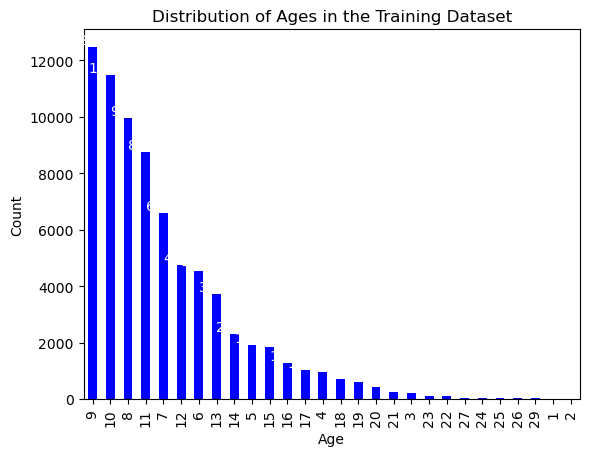

In [21]:
age_counts = train.Age.value_counts()

# Plotting the bar graph
ax = age_counts.plot(kind='bar', color='blue')

# Adding labels to the x and y axes
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Adding a title to the plot
ax.set_title('Distribution of Ages in the Training Dataset')

# Adding color to the bars
ax.bar_label(ax.containers[0], color='white')

# Displaying the plot
plt.show()


In [22]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [23]:
train.corr()

C:\Users\Slmss\AppData\Local\Temp\ipykernel_8932\2189804198.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,1.000000,0.000165,0.000290,0.000967,-0.000910,-0.000801,-0.000640,-0.000816,0.000089
Length,0.000165,1.000000,0.989437,0.918352,0.936374,0.915516,0.917855,0.916957,0.612843
Diameter,0.000290,0.989437,1.000000,0.921353,0.938249,0.914199,0.918351,0.922688,0.621256
Height,0.000967,0.918352,0.921353,1.000000,0.901775,0.864083,0.883127,0.903398,0.638067
Weight,-0.000910,0.936374,0.938249,0.901775,1.000000,0.971267,0.971062,0.965525,0.601195
Shucked Weight,-0.000801,0.915516,0.914199,0.864083,0.971267,1.000000,0.942626,0.910398,0.503320
Viscera Weight,-0.000640,0.917855,0.918351,0.883127,0.971062,0.942626,1.000000,0.933919,0.576808
Shell Weight,-0.000816,0.916957,0.922688,0.903398,0.965525,0.910398,0.933919,1.000000,0.663473
Age,0.000089,0.612843,0.621256,0.638067,0.601195,0.503320,0.576808,0.663473,1.000000


In [24]:
from xgboost import XGBRegressor

xgb=XGBRegressor()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
train['Sex'] = le.fit_transform(train.Sex)

x_train,x_test,y_train,y_test=train_test_split(train.drop('Age',axis=1),train.Age)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [31]:
from sklearn.metrics import mean_absolute_error

pred=xgb.predict(x_test)
score=mean_absolute_error(y_test,pred)

print(f'MAE: {score}')

MAE: 1.4175377629766948


In [35]:
X,Y=train.drop('Age',axis=1),train.Age

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=40)

In [41]:
cols=X.columns

scores= {}

for col in cols:
    xgb = XGBRegressor()
    scores[col] = 100
    for i in range(100):
        x_train,x_test,y_train,y_test = train_test_split(train[col],Y,random_state=i)
        xgb.fit(x_train,y_train)
        pred=xgb.predict(x_test)
        score=mean_absolute_error(y_test,pred)
        
        if scores[col] > score:
            scores[col] = score

In [39]:
from sklearn.feature_selection import RFE



'id'